       feature1  feature2  target
0      1.236497  0.579272       0
1     -0.188720 -0.022001       0
2     -0.653844  0.794309       0
3      0.005572  0.593370       0
4      0.482573  0.796902       0
...         ...       ...     ...
99995 -1.377568  0.659066       0
99996 -0.252317  0.346224       0
99997 -0.700496  0.308327       0
99998 -1.638941  0.351496       0
99999 -0.437461  0.574970       0

[100000 rows x 3 columns]
The number of records in the training dataset is 70000
The number of records in the test dataset is 30000
The training dataset has 69291 records for the majority class and 709 records for the minority class.
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29679
           1       0.05      0.02      0.03       321

    accuracy                           0.98     30000
   macro avg       0.52      0.51      0.51     30000
weighted avg       0.98      0.98      0.98     30000



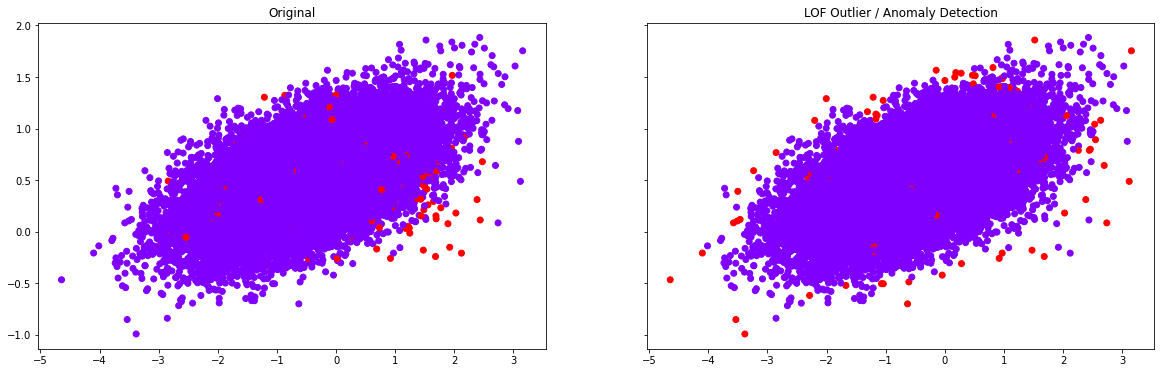

In [1]:
###### Step 1: Import Libraries
# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
###### Step 2: Create Dataset With Anomalies
# Create an imbalanced dataset
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.995, 0.005],
                           class_sep=0.5, random_state=0)
# Convert the data from numpy array to a pandas dataframe
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
# Check the target distribution
df['target'].value_counts(normalize = True)
print(df)
###### Step 3: Train Test Split
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")
###### Step 7: Outlier Detection Using Local Outlier Factor (LOF)
# The local outlier factor (LOF) model for outlier detection
lof_outlier = LocalOutlierFactor(n_neighbors=5, novelty=False)
# Predict novelties
prediction_outlier = lof_outlier.fit_predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction_outlier = [1 if i==-1 else 0 for i in prediction_outlier]
# Check the model performance
print(classification_report(y_test, prediction_outlier))
###### Step 8: Visualization
# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['feature1', 'feature2'])
df_test['y_test'] = y_test
df_test['prediction_outlier'] = prediction_outlier
# Visualize the actual and predicted anomalies
fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(20,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['feature1'], df_test['feature2'], c=df_test['y_test'], cmap='rainbow')
# Local Outlier Factor (LOF) Outlier / Anomaly Detection
ax1.set_title('LOF Outlier / Anomaly Detection')
ax1.scatter(df_test['feature1'], df_test['feature2'], c=df_test['prediction_outlier'], cmap='rainbow')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
data = pd.read_csv("dataset/Iris.csv")
#Plotting graph between PetalLengthCm & SepalLengthCm
# sns.set_style("whitegrid");
# sns_plot=sns.FacetGrid(data, hue="Species", size=6,palette=['darkorange','black','red']).map(plt.scatter, "PetalLengthCm", "SepalLengthCm") \
   # .add_legend();
# plt.show();

In [10]:
data.iloc[:, :-1]
# data.iloc[:, -1]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


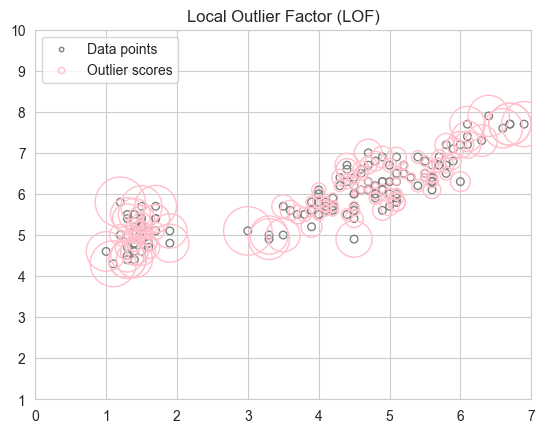

In [50]:
a = list(data['PetalLengthCm'])
x= np.array(a)
b = list(data['SepalLengthCm'])
y= np.array(b)
z=np.array([a,b])
X=z.T
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_
plt.title("Local Outlier Factor (LOF)")
plt.scatter(a,b, edgecolor='grey', s=30, label='Data points',facecolors='none')
 #plotting circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(a,b, s=1300 * radius, edgecolors='pink',facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((0, 7))
plt.ylim((1, 10))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [7]:
a = list(data['PetalLengthCm'])
x= np.array(a)
b = list(data['SepalLengthCm'])
y= np.array(b)
z=np.array([a,b])
X=z.T
X
# clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# y_pred = clf.fit_predict(X)
# X_scores = clf.negative_outlier_factor_
# round_off_values = np.around(X_scores, decimals =2)
# new =round_off_values*(-1)
# plt.title("Local Outlier Factor (LOF)")
# plt.scatter(a,b, edgecolor='grey', s=30, label='Data points',facecolors='none')
# for x_pos, y_pos, label in zip(x,y,new):
#     if label>1.5:
#         plt.annotate(label,             
#                 xy=(x_pos, y_pos),
#                 xytext=(10,5),     
#                 textcoords='offset points', 
#                 ha='right',         
#                 va='center',fontsize=5.5,color='r')
# plt.axis('tight')
# legend = plt.legend(loc='upper left')
# legend.legendHandles[0]._sizes = [10]
# plt.show()

array([[1.4, 5.1],
       [1.4, 4.9],
       [1.3, 4.7],
       [1.5, 4.6],
       [1.4, 5. ],
       [1.7, 5.4],
       [1.4, 4.6],
       [1.5, 5. ],
       [1.4, 4.4],
       [1.5, 4.9],
       [1.5, 5.4],
       [1.6, 4.8],
       [1.4, 4.8],
       [1.1, 4.3],
       [1.2, 5.8],
       [1.5, 5.7],
       [1.3, 5.4],
       [1.4, 5.1],
       [1.7, 5.7],
       [1.5, 5.1],
       [1.7, 5.4],
       [1.5, 5.1],
       [1. , 4.6],
       [1.7, 5.1],
       [1.9, 4.8],
       [1.6, 5. ],
       [1.6, 5. ],
       [1.5, 5.2],
       [1.4, 5.2],
       [1.6, 4.7],
       [1.6, 4.8],
       [1.5, 5.4],
       [1.5, 5.2],
       [1.4, 5.5],
       [1.5, 4.9],
       [1.2, 5. ],
       [1.3, 5.5],
       [1.5, 4.9],
       [1.3, 4.4],
       [1.5, 5.1],
       [1.3, 5. ],
       [1.3, 4.5],
       [1.3, 4.4],
       [1.6, 5. ],
       [1.9, 5.1],
       [1.4, 4.8],
       [1.6, 5.1],
       [1.4, 4.6],
       [1.5, 5.3],
       [1.4, 5. ],
       [4.7, 7. ],
       [4.5, 6.4],
       [4.9,

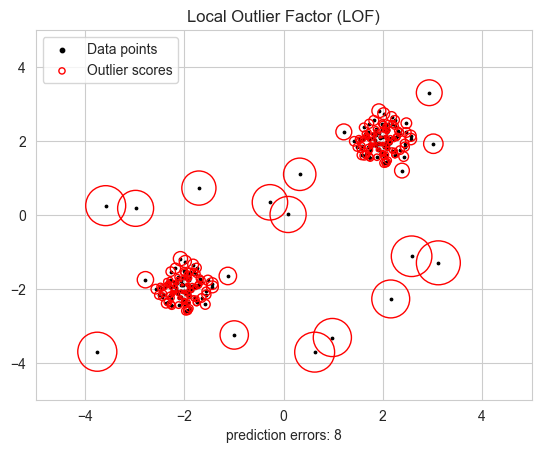

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [20]:
clf = LocalOutlierFactor(n_neighbors=10, contamination='auto')
X = data[['PetalLengthCm','SepalLengthCm']].values
y_pred = clf.fit_predict(X)

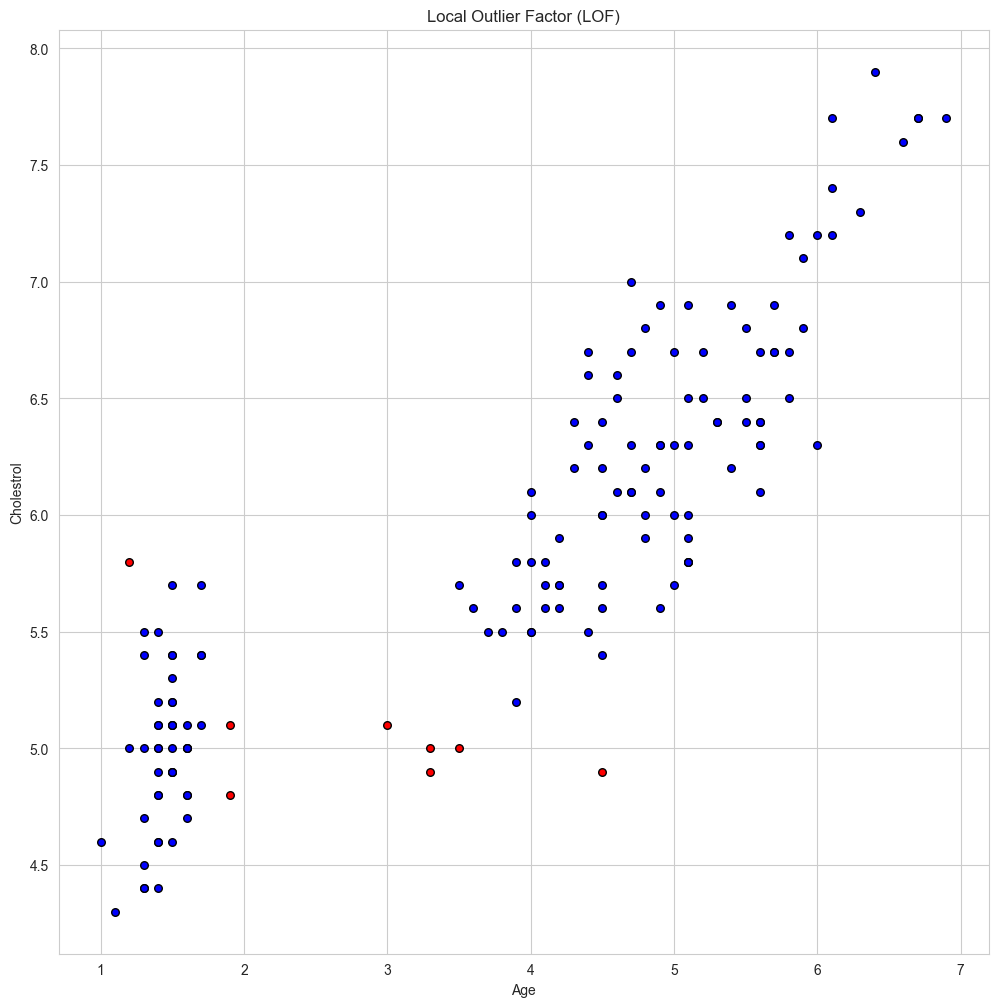

In [21]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('Cholestrol');
plt.show()

The number of records in the training dataset is 80000
The number of records in the test dataset is 20000
The training dataset has 79183 records for the majority class and 817 records for the minority class.
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19787
           1       0.06      0.03      0.04       213

    accuracy                           0.98     20000
   macro avg       0.53      0.51      0.52     20000
weighted avg       0.98      0.98      0.98     20000



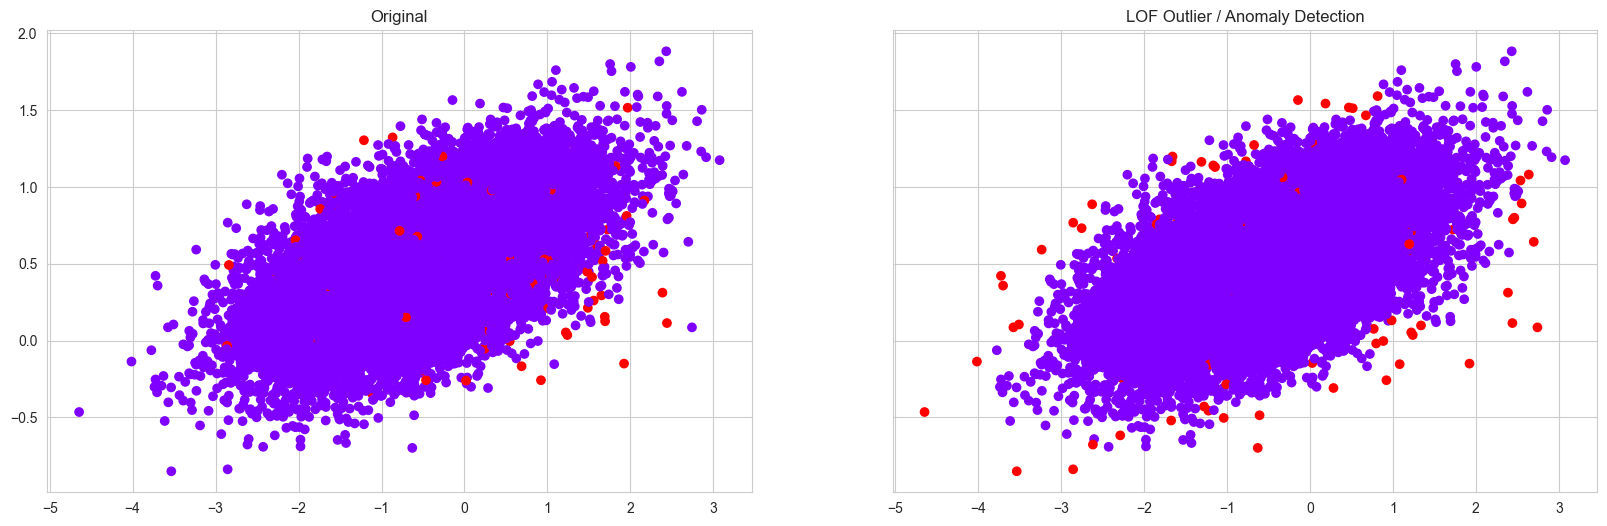

In [59]:
###### Step 1: Import Libraries
# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
###### Step 2: Create Dataset With Anomalies
# Create an imbalanced dataset
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.995, 0.005],
                           class_sep=0.5, random_state=0)
# Convert the data from numpy array to a pandas dataframe
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
# Check the target distribution
df['target'].value_counts(normalize = True)
###### Step 3: Train Test Split
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")
###### Step 4: Local Outlier Factor (LOF) Algorithm
# No code in this step
###### Step 5: Outlier / Anomaly Detection vs. Novelty Detection
# No code in this step
###### Step 7: Outlier Detection Using Local Outlier Factor (LOF)
# The local outlier factor (LOF) model for outlier detection
lof_outlier = LocalOutlierFactor(n_neighbors=5, novelty=False)
# Predict novelties
prediction_outlier = lof_outlier.fit_predict(X_test)
# Change the anomalies' values to make it consistent with the true values
prediction_outlier = [1 if i==-1 else 0 for i in prediction_outlier]
# Check the model performance
print(classification_report(y_test, prediction_outlier))
###### Step 8: Visualization
# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['feature1', 'feature2'])
df_test['y_test'] = y_test
df_test['prediction_outlier'] = prediction_outlier
# Visualize the actual and predicted anomalies
fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(20,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['feature1'], df_test['feature2'], c=df_test['y_test'], cmap='rainbow')
# Local Outlier Factor (LOF) Outlier / Anomaly Detection
ax1.set_title('LOF Outlier / Anomaly Detection')
ax1.scatter(df_test['feature1'], df_test['feature2'], c=df_test['prediction_outlier'], cmap='rainbow')

NameError: name 'pd' is not defined